In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat, savemat
from scipy.interpolate import interp1d

def db2mag(db): return np.power(10, db/20)

In [2]:
global_address = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Temperature_sweep\Fitted_data" 
sample_folders = os.listdir(global_address)
for i in range(len(sample_folders)):
    if ".PNG" in sample_folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_folders[i]) 

[0] -----------> S5W2.7


<div style="text-align: center; font-size: 45px; color: blue;">
    S5W2.7
</div>

In [3]:
sample = 0
sample_address = global_address+"\\"+sample_folders[sample]
sample_measurements = os.listdir(sample_address)
for i in range(len(sample_measurements)):
    if ".PNG" in sample_measurements[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurements[i]) 

[0] -----------> Range_1
[1] -----------> Range_3
[2] -----------> Range_4


In [12]:
%matplotlib inline

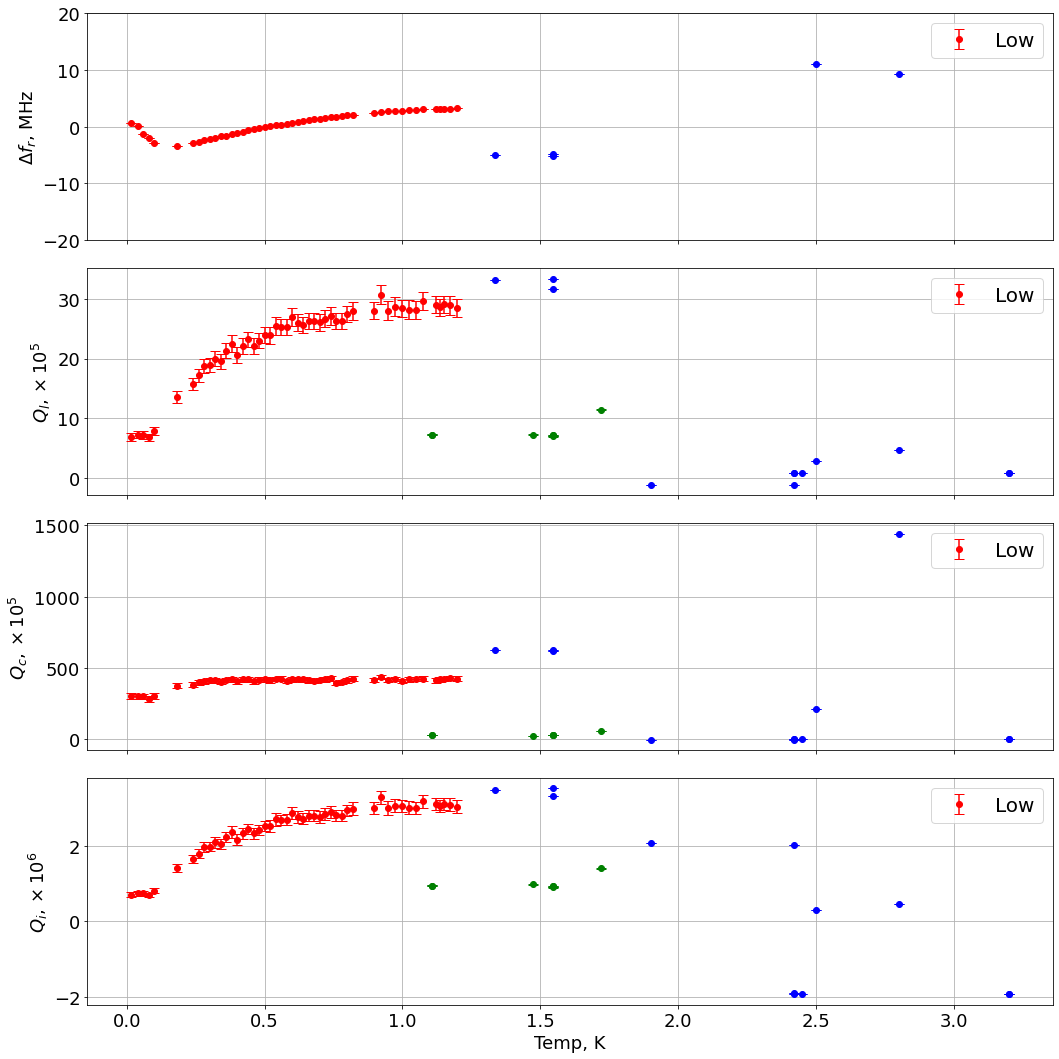

In [28]:
resonator = 1
plt.rcParams.update({
    "font.size": 16,          # General font size
    "axes.labelsize": 18,     # X and Y labels
    "axes.titlesize": 20,     # Title size
    "xtick.labelsize": 18,    # X-axis tick labels
    "ytick.labelsize": 18,    # Y-axis tick labels
    "legend.fontsize": 20,    # Legend font size
})
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), sharex = True) 


file_address = sample_address+"\\"+sample_measurements[0]+"\\"+"Circlefit_res_" + str(resonator) + ".mat"
mat = loadmat(file_address)

resonanse_freq_low_p = mat['resonanse_freq'][0]
resonanse_ql_low_p = mat['resonanse_ql'][0] 
resonanse_qc_low_p = mat['resonanse_qc'][0]
resonanse_qi_low_p = mat['resonanse_qi'][0]
resonanse_freq_err_low_p = mat['resonanse_freq_err'][0]
resonanse_ql_err_low_p = mat['resonanse_ql_err'][0]
resonanse_qc_err_low_p = mat['resonanse_qc_err'][0]
resonanse_qi_err_low_p = mat['resonanse_qi_err'][0]

good_temps_low_p = mat['good_temps'][0]

low_p_freq = np.mean(resonanse_freq_low_p[:2])

ax[0].errorbar(good_temps_low_p, (resonanse_freq_low_p-low_p_freq)/1e9*1e6, 
               yerr=resonanse_freq_err_low_p/low_p_freq, fmt='o', label='Low', color='red', capsize=5)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel(r'$\Delta f_r$, MHz')

ax[1].grid()
ax[1].errorbar(good_temps_low_p, resonanse_ql_low_p/1e5, 
               yerr=resonanse_ql_err_low_p/1e5, fmt='o', label='Low', color='red', capsize=5)
ax[1].legend()
ax[1].set_ylabel(r'$Q_l,  \times 10^{5}$')

ax[2].grid()
ax[2].errorbar(good_temps_low_p, resonanse_qc_low_p/1e5, 
               yerr=resonanse_qc_err_low_p/1e5, fmt='o', label='Low', color='red', capsize=5)
ax[2].legend()
ax[2].set_ylabel(r'$Q_c, \times 10^{5}$')

ax[3].grid()
ax[3].errorbar(good_temps_low_p, resonanse_qi_low_p/1e6, 
               yerr=resonanse_qi_err_low_p/1e6, fmt='o', label='Low', color='red', capsize=5)
ax[3].legend()
ax[3].set_ylabel(r'$Q_i, \times 10^{6}$')
ax[3].set_xlabel(r'Temp, K')


file_address = sample_address+"\\"+sample_measurements[1]+"\\"+"Circlefit_res_" + str(resonator) + ".mat"
mat = loadmat(file_address)

resonanse_freq_high_p = mat['resonanse_freq'][0]
resonanse_ql_high_p = mat['resonanse_ql'][0] 
resonanse_qc_high_p = mat['resonanse_qc'][0]
resonanse_qi_high_p = mat['resonanse_qi'][0]
resonanse_freq_err_high_p = mat['resonanse_freq_err'][0]
resonanse_ql_err_high_p = mat['resonanse_ql_err'][0]
resonanse_qc_err_high_p = mat['resonanse_qc_err'][0]
resonanse_qi_err_high_p = mat['resonanse_qi_err'][0]

good_temps_high_p = mat['good_temps'][0]
low_p_freq = np.mean(resonanse_freq_low_p[:10])
          
ax[0].errorbar(good_temps_high_p, (resonanse_freq_high_p-low_p_freq)/1e9*1e6, yerr=resonanse_freq_err_high_p/low_p_freq, fmt='o', label='High', color='green', capsize=5)
ax[1].errorbar(good_temps_high_p, resonanse_ql_high_p/1e5, yerr=resonanse_ql_err_high_p/1e5, fmt='o', label='High', color='green', capsize=5)
ax[2].errorbar(good_temps_high_p, resonanse_qc_high_p/1e5, yerr=resonanse_qc_err_high_p/1e5, fmt='o', label='High', color='green', capsize=5)
ax[3].errorbar(good_temps_high_p, resonanse_qi_high_p/1e6, yerr=resonanse_qi_err_high_p/1e6, fmt='o', label='High', color='green', capsize=5)


file_address = sample_address+"\\"+sample_measurements[2]+"\\"+"Circlefit_res_" + str(resonator) + ".mat"
mat = loadmat(file_address)

resonanse_freq_high_p = mat['resonanse_freq'][0]
resonanse_ql_high_p = mat['resonanse_ql'][0] 
resonanse_qc_high_p = mat['resonanse_qc'][0]
resonanse_qi_high_p = mat['resonanse_qi'][0]
resonanse_freq_err_high_p = mat['resonanse_freq_err'][0]
resonanse_ql_err_high_p = mat['resonanse_ql_err'][0]
resonanse_qc_err_high_p = mat['resonanse_qc_err'][0]
resonanse_qi_err_high_p = mat['resonanse_qi_err'][0]

good_temps_high_p = mat['good_temps'][0]
low_p_freq = np.mean(resonanse_freq_low_p[:10])
          
ax[0].errorbar(good_temps_high_p, (resonanse_freq_high_p-low_p_freq)/1e9*1e6, 
               yerr=resonanse_freq_err_high_p/low_p_freq, fmt='o', label='High', color='blue', capsize=5)
ax[1].errorbar(good_temps_high_p, resonanse_ql_high_p/1e5, yerr=resonanse_ql_err_high_p/1e12, fmt='o', label='High', color='blue', capsize=5)
ax[2].errorbar(good_temps_high_p, resonanse_qc_high_p/1e5, yerr=resonanse_qc_err_high_p/1e12, fmt='o', label='High', color='blue', capsize=5)
ax[3].errorbar(good_temps_high_p, resonanse_qi_high_p/1e6, yerr=resonanse_qi_err_high_p/1e12, fmt='o', label='High', color='blue', capsize=5)



ax[0].set_ylim(-20, 20)
plt.tight_layout()
plt.show()

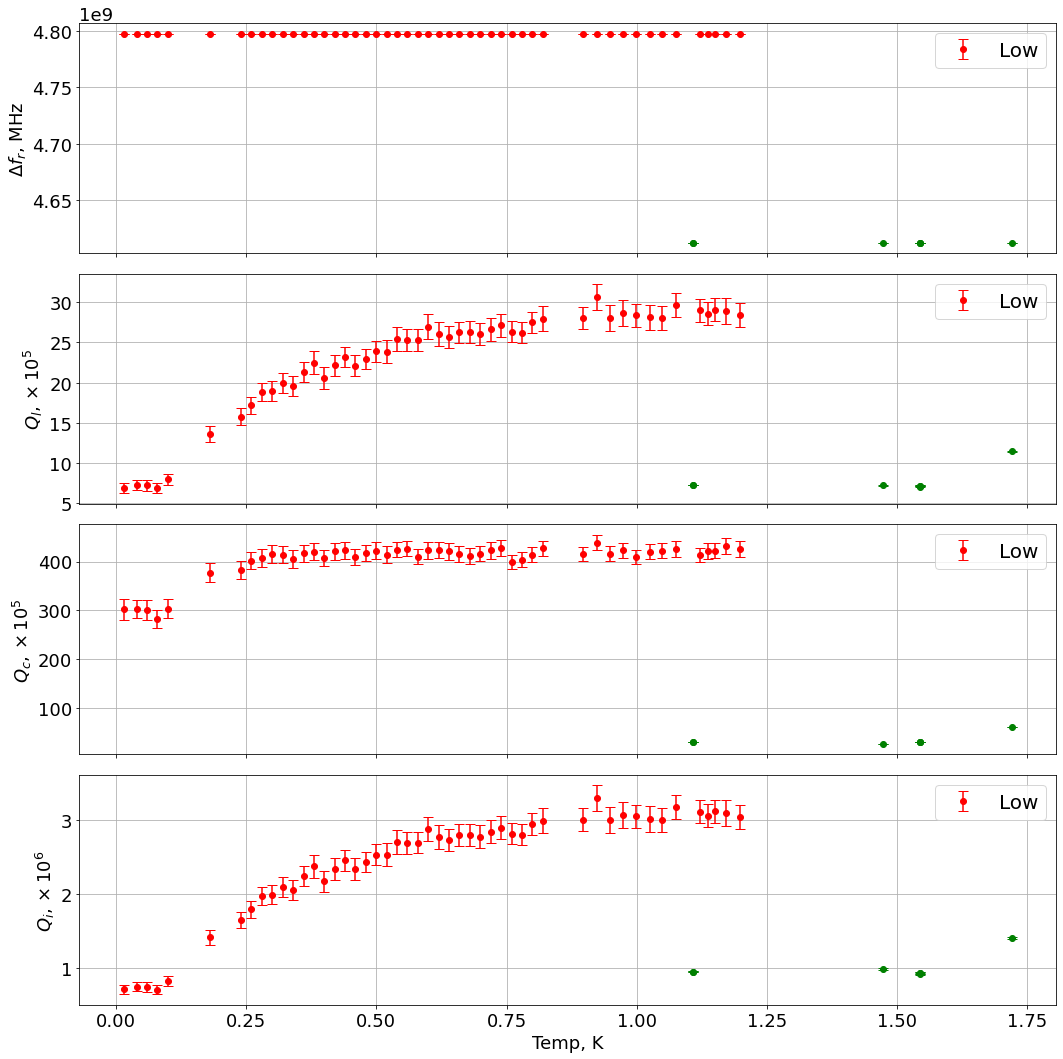

In [22]:
resonator = 1
plt.rcParams.update({
    "font.size": 16,          # General font size
    "axes.labelsize": 18,     # X and Y labels
    "axes.titlesize": 20,     # Title size
    "xtick.labelsize": 18,    # X-axis tick labels
    "ytick.labelsize": 18,    # Y-axis tick labels
    "legend.fontsize": 20,    # Legend font size
})
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), sharex = True) 

file_address = sample_address+"\\"+sample_measurements[0]+"\\"+"Circlefit_res_" + str(resonator) + ".mat"
mat = loadmat(file_address)

resonanse_freq_low_p = mat['resonanse_freq'][0]
resonanse_ql_low_p = mat['resonanse_ql'][0] 
resonanse_qc_low_p = mat['resonanse_qc'][0]
resonanse_qi_low_p = mat['resonanse_qi'][0]
resonanse_freq_err_low_p = mat['resonanse_freq_err'][0]
resonanse_ql_err_low_p = mat['resonanse_ql_err'][0]
resonanse_qc_err_low_p = mat['resonanse_qc_err'][0]
resonanse_qi_err_low_p = mat['resonanse_qi_err'][0]

good_temps_low_p = mat['good_temps'][0]

low_p_freq = np.mean(resonanse_freq_low_p[:10])

ax[0].errorbar(good_temps_low_p, (resonanse_freq_low_p), 
               yerr=resonanse_freq_err_low_p/low_p_freq, fmt='o', label='Low', color='red', capsize=5)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel(r'$\Delta f_r$, MHz')

ax[1].grid()
ax[1].errorbar(good_temps_low_p, resonanse_ql_low_p/1e5, 
               yerr=resonanse_ql_err_low_p/1e5, fmt='o', label='Low', color='red', capsize=5)
ax[1].legend()
ax[1].set_ylabel(r'$Q_l,  \times 10^{5}$')

ax[2].grid()
ax[2].errorbar(good_temps_low_p, resonanse_qc_low_p/1e5, 
               yerr=resonanse_qc_err_low_p/1e5, fmt='o', label='Low', color='red', capsize=5)
ax[2].legend()
ax[2].set_ylabel(r'$Q_c, \times 10^{5}$')

ax[3].grid()
ax[3].errorbar(good_temps_low_p, resonanse_qi_low_p/1e6, 
               yerr=resonanse_qi_err_low_p/1e6, fmt='o', label='Low', color='red', capsize=5)
ax[3].legend()
ax[3].set_ylabel(r'$Q_i, \times 10^{6}$')
ax[3].set_xlabel(r'Temp, K')



file_address = sample_address+"\\"+sample_measurements[1]+"\\"+"Circlefit_res_" + str(resonator) + ".mat"
mat = loadmat(file_address)

resonanse_freq_high_p = mat['resonanse_freq'][0]
resonanse_ql_high_p = mat['resonanse_ql'][0] 
resonanse_qc_high_p = mat['resonanse_qc'][0]
resonanse_qi_high_p = mat['resonanse_qi'][0]
resonanse_freq_err_high_p = mat['resonanse_freq_err'][0]
resonanse_ql_err_high_p = mat['resonanse_ql_err'][0]
resonanse_qc_err_high_p = mat['resonanse_qc_err'][0]
resonanse_qi_err_high_p = mat['resonanse_qi_err'][0]

good_temps_high_p = mat['good_temps'][0]
          
ax[0].errorbar(good_temps_high_p, (resonanse_freq_high_p), yerr=resonanse_freq_err_high_p/low_p_freq, fmt='o', label='High', color='green', capsize=5)
ax[1].errorbar(good_temps_high_p, resonanse_ql_high_p/1e5, yerr=resonanse_ql_err_high_p/1e5, fmt='o', label='High', color='green', capsize=5)
ax[2].errorbar(good_temps_high_p, resonanse_qc_high_p/1e5, yerr=resonanse_qc_err_high_p/1e5, fmt='o', label='High', color='green', capsize=5)
ax[3].errorbar(good_temps_high_p, resonanse_qi_high_p/1e6, yerr=resonanse_qi_err_high_p/1e6, fmt='o', label='High', color='green', capsize=5)




plt.tight_layout()
plt.show()